# 第3章 （3）実際にデータを最小二乗法で予測する

# まずはデータを生成する．
## データはある数理モデルからノイズ（正規乱数）を受けて発生すると考える．

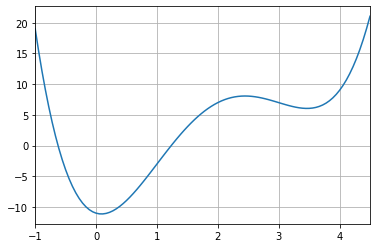

In [3]:
import numpy as np

# 目的関数
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x - 11
    return y

# 目的関数のグラフを表示する
import matplotlib.pyplot as plt

# データ生成
# x
xmin = -1.0
xmax = 4.5
num = 100 
x = np.linspace(xmin, xmax, num)

# y
y = mathfunc(x)

# グラフ表示
plt.plot(x, y)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

# これまでのデータにはノイズがないので，ノイズを加えて表示する．

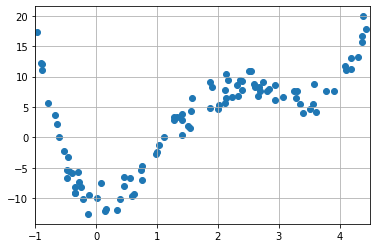

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# 目的関数
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x - 11
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# 乱数の種を設定
np.random.seed(0)

# ランダムにxを生成
x = (xmax - xmin) * np.random.rand(num) + xmin

# ｘからｙを生成する．
y = mathfunc(x)

# yにノイズ（正規乱数（平均0．0， 標準偏差1.5））を加える．
y += np.random.normal(loc=0.0, scale=1.5, size=num)

# グラフ表示
plt.scatter(x, y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

# このデータを扱いやすいようにPandasに変換する

In [89]:
ｘ

array([ 2.01847427,  2.93354152,  2.31519857,  1.99685751,  1.3301014 ,
        2.55241762,  1.40672966,  3.9047515 ,  4.30014518,  1.10892835,
        3.35448771,  1.90892206,  2.12424509,  4.09078151, -0.60930168,
       -0.52078885, -0.88879881,  3.57940915,  3.27986213,  3.78506682,
        4.38240088,  3.3953721 ,  1.53813649,  3.29291047, -0.34949066,
        2.51956562, -0.21155692,  4.19567904,  1.87016577,  1.28064067,
        0.45505587,  3.25828529,  1.50882683,  2.12638672, -0.8966561 ,
        2.39699523,  2.36652647,  2.39313698,  4.19061443,  2.75001165,
        0.97729345,  1.40367575,  2.83697158, -0.66875991,  2.66721693,
        2.68850828,  0.15710409, -0.29090536,  0.73485593,  1.00040924,
        2.13608224,  1.41230832,  4.43605611, -0.43875354,  0.14882216,
       -0.11279765,  2.59209579,  0.39310381,  1.56470925,  0.34434076,
       -0.12566729, -0.39293672,  2.60981274, -0.23999377,  0.08120299,
        1.02798844,  3.51546276, -0.46594298,  3.60869699, -0.47

In [30]:
y

array([ 5.34259892e+00,  8.54946058e+00,  8.68825613e+00,  4.67986275e+00,
        3.39168969e+00,  1.08680563e+01,  3.81388217e+00,  7.64835261e+00,
        1.31417562e+01, -7.28293410e-03,  5.52574415e+00,  8.32857556e+00,
        7.84125514e+00,  1.17995144e+01, -7.62736083e-03, -2.29224324e+00,
        1.21424763e+01,  8.83134811e+00,  6.44459457e+00,  7.56308677e+00,
        1.98968179e+01,  4.06389761e+00,  1.55055209e+00,  7.68324752e+00,
       -9.15620238e+00,  1.09664414e+01, -1.01023926e+01,  1.11732775e+01,
        9.13438448e+00,  2.78689178e+00, -6.54743222e+00,  7.65758369e+00,
        1.86299118e+00,  1.04014446e+01,  1.21734612e+01,  9.26786887e+00,
        9.46550807e+00,  7.82971742e+00,  1.31098424e+01,  9.07468933e+00,
       -2.73049972e+00,  3.62115068e-01,  7.91981688e+00,  3.63896706e+00,
        6.82134610e+00,  7.59854506e+00, -1.17101837e+01, -5.62601493e+00,
       -5.35892852e+00, -2.38348712e+00,  6.41476975e+00,  2.91741476e+00,
        1.77793051e+01, -

In [32]:
array = np.array([x,y])

In [35]:
array[0,0] # xの0番目のデータ

2.018474271600286

In [38]:
array[1,0] # yの0番目のデータ

5.3425989210442575

In [40]:
# Pandasのデータフレーム形式に変換する

import pandas as pd

df = pd.DataFrame(array.T, columns=['x','y'])

In [42]:
df

,x,y
0,2.018474,5.342599
1,2.933542,8.549461
2,2.315199,8.688256
3,1.996858,4.679863
4,1.330101,3.391690
...,...,...
95,0.007552,-9.999242
96,2.225821,6.620621
97,-0.889408,11.127026
98,3.559170,5.436300


In [43]:
df.x[0] # xの0番目のデータ

2.018474271600286

In [44]:
df.y[0] # yの0番目のデータ

5.3425989210442575

In [111]:
# データをｘの小さい順にソートする
df = df.sort_values('x')

In [113]:
df

,x,y
99,-0.974175,17.327742
34,-0.896656,12.173461
97,-0.889408,11.127026
16,-0.888799,12.142476
75,-0.784467,5.675902
...,...,...
8,4.300145,13.141756
70,4.370527,16.611522
72,4.372186,15.646326
20,4.382401,19.896818


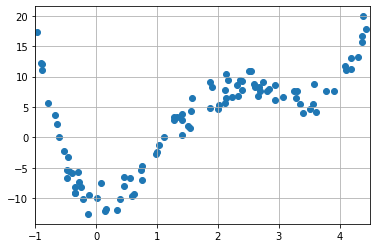

In [91]:
# グラフ表示
plt.scatter(df.x, df.y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

# これでデータ生成が完了

# ここから最小二乗法のパラメータを求める．（素朴な方法）
# 次数=2

In [92]:
# 連立1次方程式 Ax = bの行列Aを求める
# 次数2のとき
matrixA = np.zeros((2,2))
b = np.zeros((2,1))

In [93]:
matrixA[0,0] = sum(df.x * df.x)
matrixA[0,1] = sum(df.x)
matrixA[1,0] = sum(df.x)
matrixA[1,1] = len(df.x)

b[0,0] = sum(df.x*df.y)
b[1,0] = sum(df.y)

In [94]:
matrixA

array([[507.5485627 , 160.03661173],
       [160.03661173, 100.        ]])

In [95]:
b

array([[1325.90319346],
       [ 288.22870998]])

In [96]:
# 行列Aの逆行列を求めて，ベクトルbに左から掛ける
ans = np.dot(np.linalg.inv(matrixA),b)
ans

array([[ 3.43883763],
       [-2.62111213]])

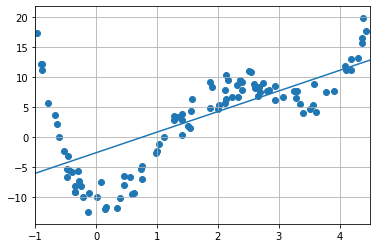

In [97]:
# 求めたパラメータをグラフに表示する

# 求めた関数
def solve_func(x):
    y = ans[0] * x + ans[1]
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# xを生成
# xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
y = solve_func(x)

# グラフ表示
plt.plot(x, y) # 求めたパラメータから直線を引く

plt.scatter(df.x, df.y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

# ここから最小二乗法のパラメータを求める．（素朴な方法）
# 次数=4

In [98]:
# 連立1次方程式 Ax = bの行列Aを求める
# 次数2のとき
matrixA = np.zeros((3,3))
b = np.zeros((3,1))

matrixA[0,0] = sum(df.x * df.x *df.x*df.x)
matrixA[0,1] = sum(df.x * df.x *df.x)
matrixA[0,2] = sum(df.x * df.x)
matrixA[1,0] = sum(df.x * df.x *df.x)
matrixA[1,1] = sum(df.x * df.x)
matrixA[1,2] = sum(df.x)
matrixA[2,0] = sum(df.x * df.x)
matrixA[2,1] = sum(df.x)
matrixA[2,2] = len(df.x)

b[0,0] = sum(df.x*df.x*df.y)
b[1,0] = sum(df.x*df.y)
b[2,0] = sum(df.y)

ans = np.dot(np.linalg.inv(matrixA),b)
ans

array([[ 0.72803602],
       [ 1.02925265],
       [-2.46003031]])

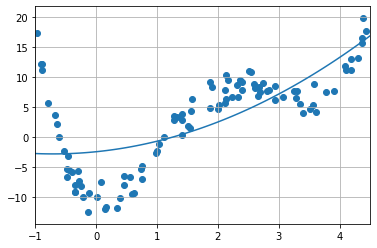

In [99]:
# 求めたパラメータをグラフに表示する

# 求めた関数
def solve_func(x):
    y = ans[0]*x*x + ans[1]*x + ans[2]
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# xを生成
# xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
y = solve_func(x)

# グラフ表示
plt.plot(x, y) # 求めたパラメータから直線を引く

plt.scatter(df.x, df.y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

# 機械学習ライブラリを使って，求める

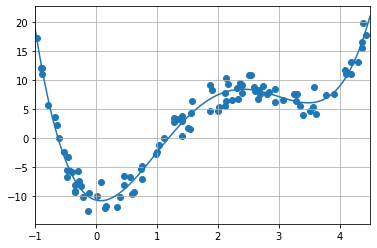

In [100]:
# numpyのライブラリを使ってパラメータを求める
ans = np.polyfit(df.x, df.y, 4)

# 求めたパラメータをグラフに表示する

# 求めた関数
def solve_func(x):
    y = ans[0]*x*x*x*x + ans[1]*x*x*x + ans[2]*x*x + ans[3]*x + ans[4]
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# xを生成
# xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
y = solve_func(x)

# グラフ表示
plt.plot(x, y) # 求めたパラメータから直線を引く

plt.scatter(df.x, df.y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

In [118]:
# 最小二乗法（次数4）
np.polyfit(df.x, df.y, 4)

array([  1.00698752,  -8.02485901,  17.86535698,  -2.59884428,
       -10.67072881])

In [119]:
# 求めたパラメータを持つ多項式を作成
np.poly1d(np.polyfit(df.x, df.y, 4))

poly1d([  1.00698752,  -8.02485901,  17.86535698,  -2.59884428,
       -10.67072881])

In [120]:
# 求めた多項式f(x)にｘを与えて，yを計算する．
np.poly1d(np.polyfit(df.x, df.y, 4))(df.x)

array([ 17.14149618,  12.45922454,  12.0491841 ,  12.01490215,
         6.6174858 ,   1.65899772,   0.84619774,  -0.50073042,
        -3.26424194,  -4.28017556,  -4.58379053,  -4.72195727,
        -5.37619856,  -6.38028237,  -7.22272663,  -7.26793074,
        -7.41211238,  -8.19806995,  -8.43072622,  -8.90376366,
        -9.24333691, -10.04582755, -10.13859883, -10.68934097,
       -10.768213  , -10.6877688 , -10.66857431,  -9.76079865,
        -9.39503603,  -8.86687539,  -8.82517543,  -7.88184379,
        -7.49227024,  -7.07915912,  -5.823844  ,  -5.65096481,
        -5.61114447,  -2.71924747,  -2.41673262,  -2.05607015,
        -1.00374281,   1.12824675,   1.15489024,   1.74732709,
         2.59666657,   2.63101975,   2.69357844,   3.73367806,
         4.03268485,   4.29654722,   4.42183474,   6.78142823,
         6.83010112,   7.01918059,   7.49083259,   7.59230428,
         7.98030447,   8.00669524,   8.01368634,   8.04464716,
         8.13781959,   8.2782272 ,   8.41834706,   8.42

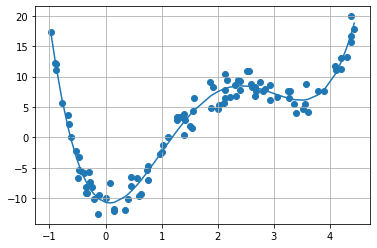

In [117]:
# それを一度に書くと以下のようになる．
plt.plot(df.x, np.poly1d(np.polyfit(df.x, df.y, 4))(df.x))

plt.scatter(df.x, df.y) # 散布図
plt.grid(True)